# PROJECT WITH INTERN CAREER

# TITANIC 

The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with
an iceberg.

## Source of DataSet 

Intern Career

## Type of Problem

Binary Classification

## Project Objective 

(i) To build a predictive model that predict wheather the passenger was survived or not.

(ii) Answers the question: “what sorts of people were more likely to survive?” using passenger data (i.e, Age,
Gender,passenger class, boarding place, cabin or not etc).

### Import Necessary Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix as cm, accuracy_score as acscore, classification_report as cr
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

### Load DataSets

In [2]:
df = pd.read_csv("gender_submission.csv")
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [3]:
df_test = pd.read_csv("test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
result = pd.merge(df_test,df,on = "PassengerId", how= "inner")
result.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [5]:
df_train = pd.read_csv("train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Make a final dataframe named merged_df by concatenate the above dataframe df_train & result.
merged_df = pd.concat([df_train,result],ignore_index = True)
merged_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Exploration

In [7]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


There are 12 Columns and 1309 Rows in the given data.

In [8]:
merged_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [9]:
merged_df.shape

(1309, 12)

## Data Cleaning and Pre-Processing
### Find Null Values

In [10]:
merged_df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

We find out that there are some null values present in our data.

### Treat Null Values

In [11]:
# Age column
median_age = merged_df["Age"].median()
merged_df["Age"] = merged_df["Age"].fillna(median_age)

In [12]:
# Fare column
mean_fare = merged_df["Fare"].mean()
merged_df["Fare"] = merged_df["Fare"].fillna(mean_fare)

In [13]:
# Cabin Column
merged_df["Cabin"] = merged_df["Cabin"].fillna("NA")

In [14]:
# Embarked Column
mode_embarked = merged_df["Embarked"].mode()[0]
merged_df["Embarked"] = merged_df["Embarked"].fillna(mode_embarked)

### Convert Data Type

In [15]:
# Convert Age column into int
merged_df["Age"] = merged_df["Age"].astype(int)

In [16]:
# Convert Fare into int by using math
merged_df["Fare"]= merged_df["Fare"].apply(math.floor)

### Extract New Features

In [17]:
merged_df["Name"]

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [18]:
merged_df['Title'] = merged_df['Name'].str.extract(r',\s*([^\.]*)\.', expand=False)
merged_df["Title"]

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Title, Length: 1309, dtype: object

In [19]:
merged_df["Age"].unique()

array([22, 38, 26, 35, 28, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
        8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 29, 65,  5, 11, 45, 17, 32,
       16, 25,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74, 67, 76])

In [20]:
# Define the age groups
bins = [0, 18, 35, 50, float("inf")]
labels = ["1-18", "19-35", "36-50", "55+"]

# Create a new column 'AgeGroup' with the age groups
merged_df["AgeGroup"] = pd.cut(merged_df["Age"], bins=bins, labels=labels, include_lowest=True)

# Display the DataFrame with the new 'AgeGroup' column
print(merged_df[["Age", "AgeGroup"]])

      Age AgeGroup
0      22    19-35
1      38    36-50
2      26    19-35
3      35    19-35
4      35    19-35
...   ...      ...
1304   28    19-35
1305   39    36-50
1306   38    36-50
1307   28    19-35
1308   28    19-35

[1309 rows x 2 columns]


In [21]:
merged_df["Fare"].unique()

array([  7,  71,  53,   8,  51,  21,  11,  30,  16,  26,  31,  29,  13,
        18,  35, 263,  27, 146,  10,  82,  52,   9,  41,  15,  17,  39,
        76,  61,  46,  80,  83,  73,  14,  56,  12,  47,  34,  20,  63,
        23,  77,  24, 247,  22,   6,  79,  36,  66,  69,  55,  25,  33,
        28,   0,  50, 113,  90,  86, 512, 153, 135,  19,  78,  91, 151,
       110, 108, 262, 164, 134,  57, 133,  75, 211,   4, 227, 120,  32,
        81,  89,  38,  49,  59,  93, 221, 106,  40,  42,  65,  37,   5,
         3,  60, 136,  45], dtype=int64)

In [22]:
# Define the fare bins and labels
bins = [0, 50, 100, float("inf")]
labels = ['Low Fare', 'Middle Fare', 'High Fare']

# Create a new column 'Fare_Category' with the fare categories
merged_df['Fare_Category'] = pd.cut(merged_df['Fare'], bins=bins, labels=labels, include_lowest=True)

# Display the DataFrame with the new 'Fare_Category' column
print(merged_df[['Fare', 'Fare_Category']])

      Fare Fare_Category
0        7      Low Fare
1       71   Middle Fare
2        7      Low Fare
3       53   Middle Fare
4        8      Low Fare
...    ...           ...
1304     8      Low Fare
1305   108     High Fare
1306     7      Low Fare
1307     8      Low Fare
1308    22      Low Fare

[1309 rows x 2 columns]


In [23]:
merged_df["Cabin"].unique()

array(['NA', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64'

In [24]:
# Create a new column as Cabin_Status
merged_df['Cabin_Status'] = np.where(merged_df['Cabin'] == 'NA', 'Not a Cabin', 'Have a Cabin')

# Display the DataFrame with the new 'Cabin_Status' column
print(merged_df[['Cabin', 'Cabin_Status']])

     Cabin  Cabin_Status
0       NA   Not a Cabin
1      C85  Have a Cabin
2       NA   Not a Cabin
3     C123  Have a Cabin
4       NA   Not a Cabin
...    ...           ...
1304    NA   Not a Cabin
1305  C105  Have a Cabin
1306    NA   Not a Cabin
1307    NA   Not a Cabin
1308    NA   Not a Cabin

[1309 rows x 2 columns]


In [25]:
merged_df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [26]:
# Replace the values in the 'Embarked' column
merged_df['Departure_Place'] = merged_df['Embarked'].replace({'C': 'Cherbourg', 'S': 'Southampton', 'Q': 'Queenstown'})

In [27]:
merged_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,Fare_Category,Cabin_Status,Departure_Place
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,NA,S,Mr,19-35,Low Fare,Not a Cabin,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C85,C,Mrs,36-50,Middle Fare,Have a Cabin,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,NA,S,Miss,19-35,Low Fare,Not a Cabin,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,C123,S,Mrs,19-35,Middle Fare,Have a Cabin,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,NA,S,Mr,19-35,Low Fare,Not a Cabin,Southampton


### Duplicate Values

In [28]:
merged_df.duplicated().sum()

0

Not a single value is duplicate in dataframe.

### Write the clean dataframe into a csv file named "new_titanic.csv"  

In [29]:
titanic = merged_df.to_csv('new_titanic.csv', index=False)

### Exploratory Data Analysis

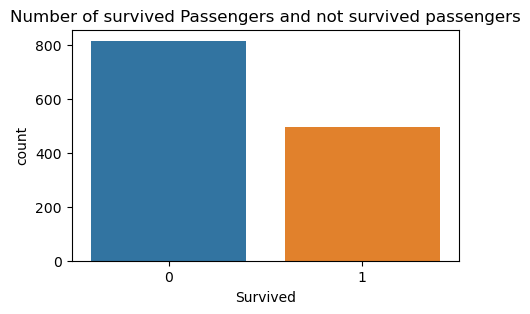

In [12]:
plt.figure(figsize = (5,3))
sns.countplot(x = 'Survived',data = merged_df)
plt.title("Number of survived Passengers and not survived passengers")
plt.show()

Target feature is not highly inbalance.

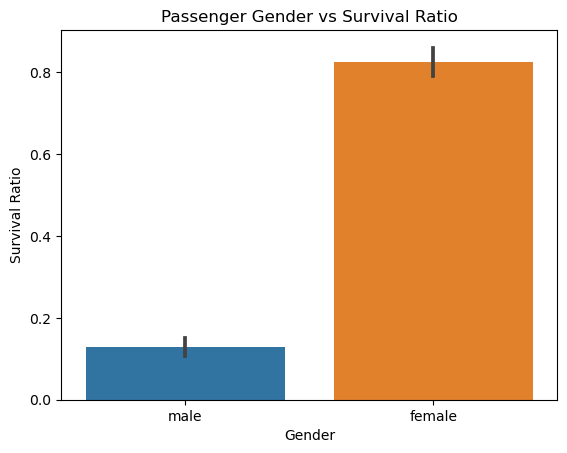

In [31]:
sns.barplot(x="Sex", y="Survived", data=merged_df)
plt.title("Passenger Gender vs Survival Ratio")
plt.xlabel("Gender")
plt.ylabel("Survival Ratio")
plt.show()

Female Passengers had higher chance to survive than male passengers.

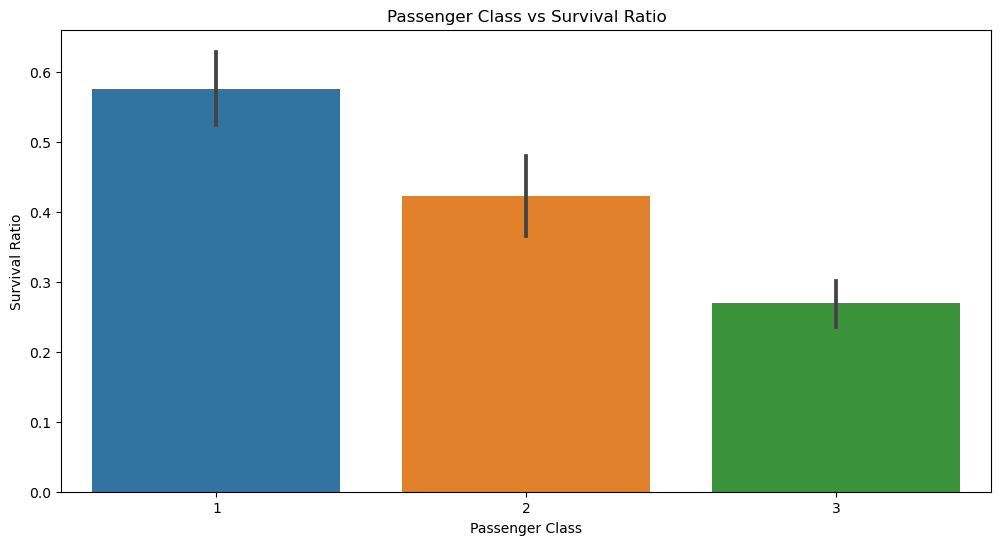

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Pclass", y="Survived", data=merged_df)
plt.title("Passenger Class vs Survival Ratio")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Ratio")
plt.show()

Class 1st Passengers had higher chance to survive rather than 2nd or 3rd class.

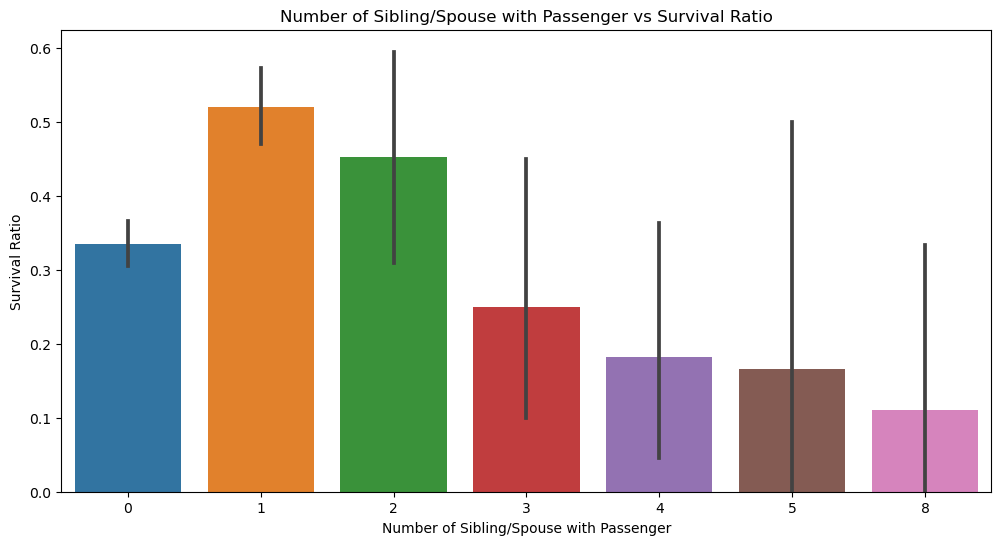

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x="SibSp", y="Survived", data=merged_df)
plt.title("Number of Sibling/Spouse with Passenger vs Survival Ratio")
plt.xlabel("Number of Sibling/Spouse with Passenger")
plt.ylabel("Survival Ratio")
plt.show()

Passengers having 1 SibSp had higher chance to survive.

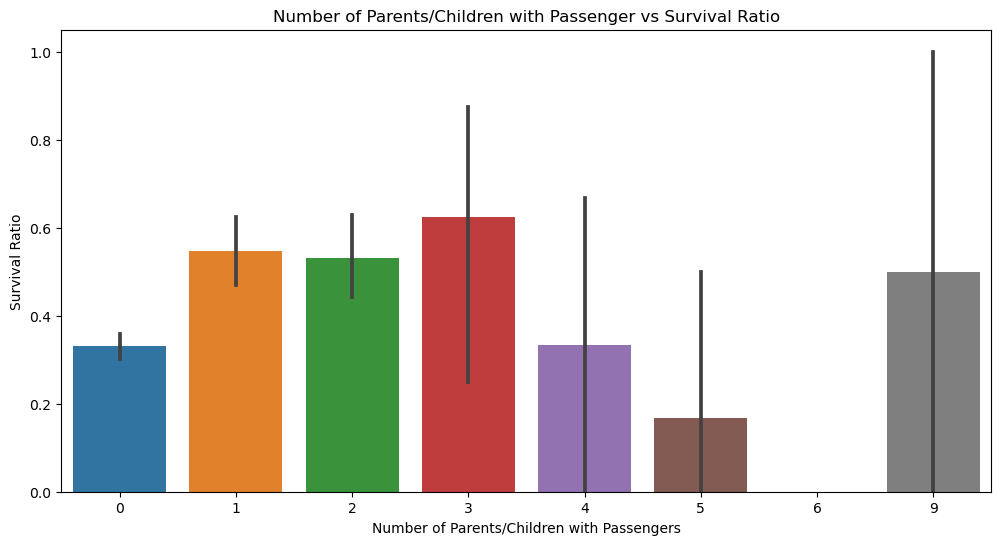

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Parch", y="Survived", data=merged_df)
plt.title("Number of Parents/Children with Passenger vs Survival Ratio")
plt.xlabel("Number of Parents/Children with Passengers")
plt.ylabel("Survival Ratio")
plt.show()

Passengers having 3 Parch had higher chance to survive.

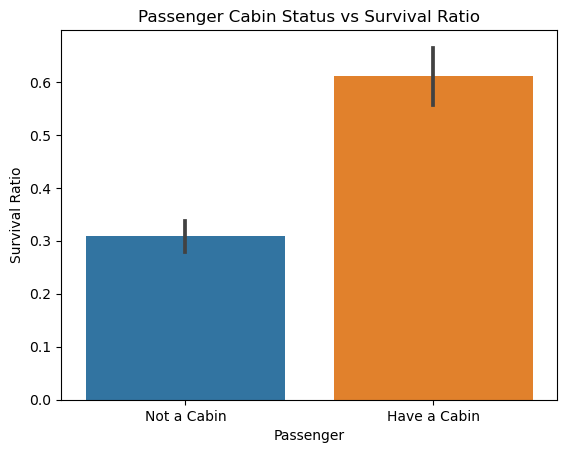

In [35]:
sns.barplot(x="Cabin_Status", y="Survived", data=merged_df)
plt.title("Passenger Cabin Status vs Survival Ratio")
plt.xlabel("Passenger")
plt.ylabel("Survival Ratio")
plt.show()

Passengers who had a cabin had a higher chance of survival.

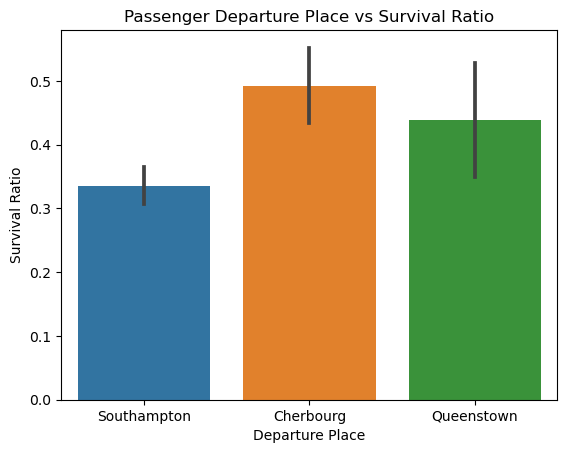

In [36]:
sns.barplot(x="Departure_Place", y="Survived", data=merged_df)
plt.title("Passenger Departure Place vs Survival Ratio")
plt.xlabel("Departure Place")
plt.ylabel("Survival Ratio")
plt.show()

Passengers who had departured from Cherbourg had higher chance to survive.

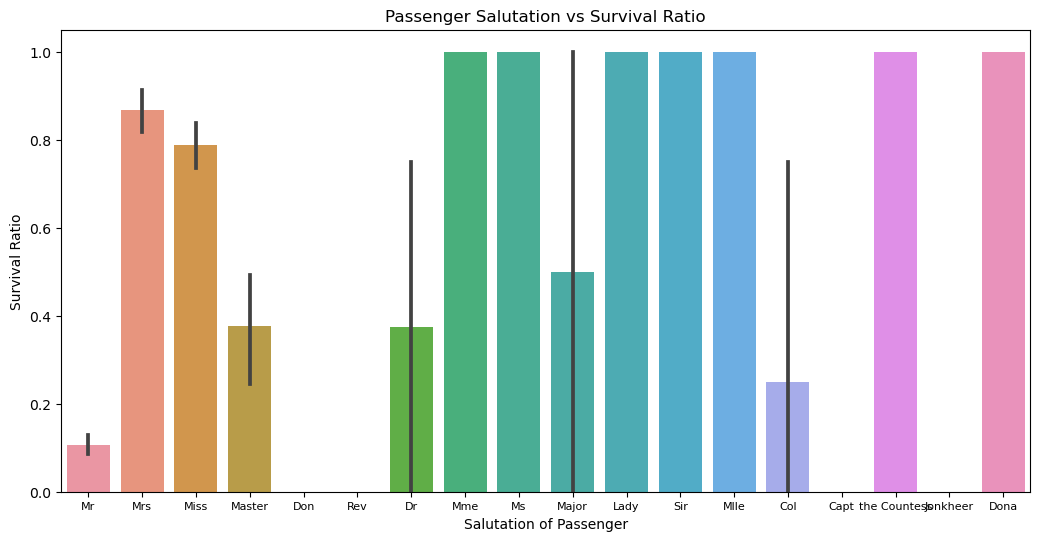

In [37]:
plt.figure(figsize=(12.5, 6))

sns.barplot(x="Title", y="Survived", data=merged_df, linewidth=40)
plt.title("Passenger Salutation vs Survival Ratio")
plt.xlabel("Salutation of Passenger")
plt.ylabel("Survival Ratio")
plt.xticks(fontsize=8)
plt.show()

Those Passengers whose salutation were Don, Rev, Capt had zero chance to survive.

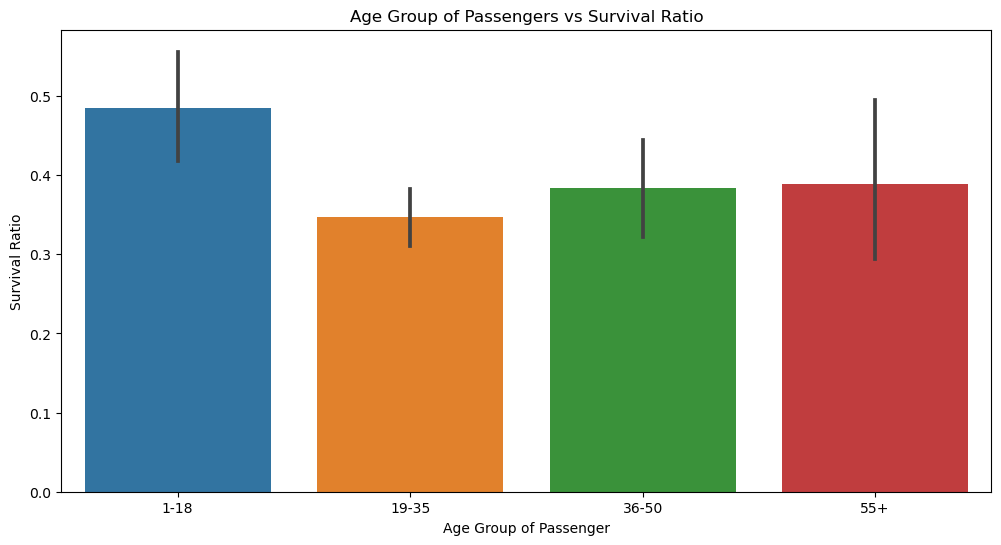

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x="AgeGroup", y="Survived", data=merged_df)
plt.title("Age Group of Passengers vs Survival Ratio")
plt.xlabel("Age Group of Passenger")
plt.ylabel("Survival Ratio")
plt.show()

Those Passengers whose age lied in between 1-18 had high chance to survive whereas those lied in between 19-35 had very low chance to survive.

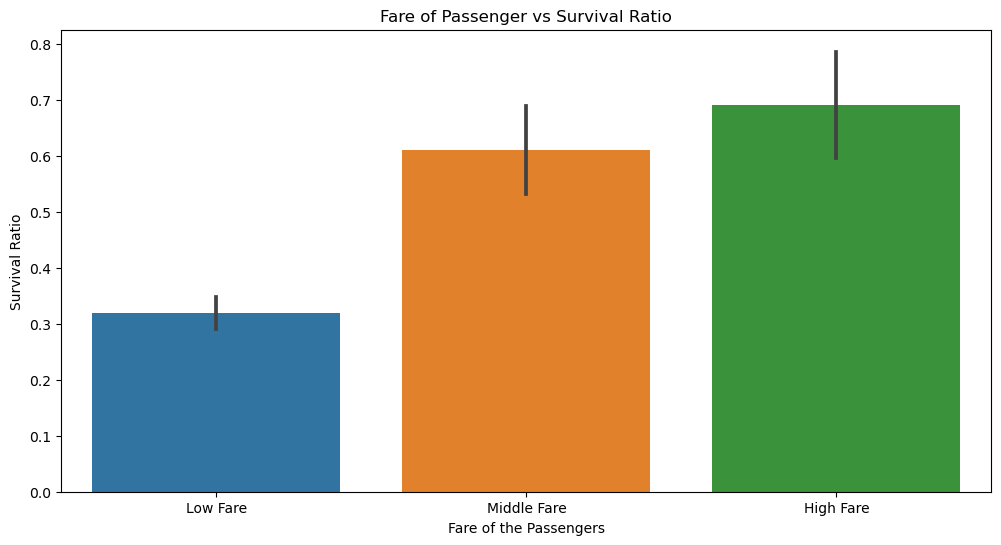

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Fare_Category", y="Survived", data=merged_df)
plt.title("Fare of Passenger vs Survival Ratio")
plt.xlabel("Fare of the Passengers")
plt.ylabel("Survival Ratio")
plt.show()

Those Passengers who paid high amount as fare, had higher chance to survive.

### Drop Un-Necessary Columns

In [40]:
merged_df.drop("PassengerId", axis=1,inplace=True)
merged_df.drop("Name", axis=1,inplace=True)
merged_df.drop("Age", axis=1,inplace=True)
merged_df.drop("Ticket", axis=1,inplace=True)
merged_df.drop("Cabin", axis=1,inplace=True)
merged_df.drop("Embarked", axis=1,inplace=True)
merged_df.drop("Title", axis=1,inplace=True)

In [41]:
merged_df

,Survived,Pclass,Sex,SibSp,Parch,Fare,AgeGroup,Fare_Category,Cabin_Status,Departure_Place
0,0,3,male,1,0,7,19-35,Low Fare,Not a Cabin,Southampton
1,1,1,female,1,0,71,36-50,Middle Fare,Have a Cabin,Cherbourg
2,1,3,female,0,0,7,19-35,Low Fare,Not a Cabin,Southampton
3,1,1,female,1,0,53,19-35,Middle Fare,Have a Cabin,Southampton
4,0,3,male,0,0,8,19-35,Low Fare,Not a Cabin,Southampton
...,...,...,...,...,...,...,...,...,...,...
1304,0,3,male,0,0,8,19-35,Low Fare,Not a Cabin,Southampton
1305,1,1,female,0,0,108,36-50,High Fare,Have a Cabin,Cherbourg
1306,0,3,male,0,0,7,36-50,Low Fare,Not a Cabin,Southampton
1307,0,3,male,0,0,8,19-35,Low Fare,Not a Cabin,Southampton


In [42]:
merged_df["Sex"] = merged_df["Sex"].map({"male":1,"female":0})

In [43]:
merged_df["AgeGroup"] = merged_df["AgeGroup"].map({"1-18":1, "19-35":2, "36-50":3, "55+":4})

In [44]:
merged_df["Fare_Category"] = merged_df["Fare_Category"].map({"Low Fare":1, "Middle Fare":2, "High Fare":3})

In [45]:
merged_df["Cabin_Status"] = merged_df["Cabin_Status"].map({"Not a Cabin":0,"Have a Cabin":1})

In [46]:
merged_df["Departure_Place"] = merged_df["Departure_Place"].map({"Cherbourg":0,"Southampton":1,"Queenstown":2})

In [47]:
merged_df

,Survived,Pclass,Sex,SibSp,Parch,Fare,AgeGroup,Fare_Category,Cabin_Status,Departure_Place
0,0,3,1,1,0,7,2,1,0,1
1,1,1,0,1,0,71,3,2,1,0
2,1,3,0,0,0,7,2,1,0,1
3,1,1,0,1,0,53,2,2,1,1
4,0,3,1,0,0,8,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,0,3,1,0,0,8,2,1,0,1
1305,1,1,0,0,0,108,3,3,1,0
1306,0,3,1,0,0,7,3,1,0,1
1307,0,3,1,0,0,8,2,1,0,1


In [48]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Survived         1309 non-null   int64   
 1   Pclass           1309 non-null   int64   
 2   Sex              1309 non-null   int64   
 3   SibSp            1309 non-null   int64   
 4   Parch            1309 non-null   int64   
 5   Fare             1309 non-null   int64   
 6   AgeGroup         1309 non-null   category
 7   Fare_Category    1309 non-null   category
 8   Cabin_Status     1309 non-null   int64   
 9   Departure_Place  1309 non-null   int64   
dtypes: category(2), int64(8)
memory usage: 84.8 KB


Here, we find out that AgeGroup and Fare_Category Column's datatype is category. Change this datatype into a suitable or
relevant datatype i.e, int

In [49]:
merged_df["AgeGroup"] = merged_df["AgeGroup"].astype(int)

In [50]:
merged_df["Fare_Category"] = merged_df["Fare_Category"].astype(int)

### Re-Arrange the columns

In [51]:
merged_df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'AgeGroup',
       'Fare_Category', 'Cabin_Status', 'Departure_Place'],
      dtype='object')

In [52]:
new_column_order = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'AgeGroup','Fare_Category', 'Cabin_Status', 'Departure_Place',
                    'Survived']
new_df = merged_df[new_column_order]

### Distribution of data into dependent feature and independant features.

In [53]:
X = new_df.iloc[:1309,:-1].values
y = new_df.iloc[:1309,-1].values

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [55]:
X_train

array([[2, 0, 0, ..., 1, 1, 1],
       [2, 1, 1, ..., 1, 0, 1],
       [3, 0, 0, ..., 1, 0, 2],
       ...,
       [1, 1, 0, ..., 1, 0, 1],
       [3, 1, 2, ..., 1, 0, 1],
       [3, 1, 0, ..., 1, 0, 1]], dtype=int64)

In [56]:
X_test

array([[3, 1, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [3, 1, 0, ..., 1, 0, 1],
       ...,
       [3, 0, 0, ..., 1, 0, 2],
       [2, 0, 1, ..., 1, 0, 1],
       [2, 0, 0, ..., 1, 0, 1]], dtype=int64)

In [57]:
y_train

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [58]:
y_test

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0],
      dtype=int64)

### Standarized the data

In [59]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Building

### Applied Models

### (i) Logistics Regression
Logistic regression is a type of statistical model used for binary classification, which means it's used when you
want to predict whether something is true or false, yes or no, 0 or 1. It's called "logistic" because it's based on the
logistic function, which is an S-shaped curve that maps any real-valued number to a value between 0 and 1.

### (ii) Random Forest Classifier
A Random Forest classifier is an ensemble learning method that builds multiple decision trees during training and
outputs the mode of the classes (classification) or the average prediction (regression) of the individual
trees.Overall, Random Forest is a powerful and versatile machine learning algorithm that is widely used for
classification and regression tasks due to its robustness and high performance.

### (iii) Decission Tree Classifier
A Decision Tree classifier is a machine learning model that uses a tree-like structure of decisions and their
possible consequences to classify input data. It breaks down a dataset into smaller subsets based on different
conditions and recursively constructs a tree to make predictions.Decision Tree classifiers are valuable for their
simplicity, interpretability, and ability to handle a variety of data types, making them a popular choice for many
machine learning tasks.

### (iv) Support Vector Classifier
A Support Vector Classifier (SVC), also known as Support Vector Machine (SVM), is a powerful supervised
learning algorithm used for classification tasks. It works by finding the optimal hyperplane that best separates
different classes in the feature space.SVC is a versatile and effective algorithm for classification tasks, especially
in scenarios with high-dimensional data and complex decision boundaries.


## Evaluation Metrices 

### (i) Confusion Matrix
### (ii) Accuracy
### (iii) Classification Report
### (iv) Receiver Operating Characteristic Curve (ROC Curve).

### (A) Apply Logistic Regression

In [60]:
# Fit the model
LOR = LogisticRegression()
LOR.fit(X_train,y_train)

LogisticRegression()

In [61]:
y_pred = LOR.predict(X_train)

In [62]:
cm_train = cm(y_train,y_pred)
accuracy_train = acscore(y_train,y_pred)
classification_report = cr(y_train,y_pred)
print("accuracy_score of train data", accuracy_train,"\n")
print("Confusion_Matrix of train data\n", cm_train,"\n")
print("classification_report of train data\n","\n", classification_report)

accuracy_score of train data 0.8576886341929322 

Confusion_Matrix of train data
 [[593  63]
 [ 86 305]] 

classification_report of train data
 
               precision    recall  f1-score   support

           0       0.87      0.90      0.89       656
           1       0.83      0.78      0.80       391

    accuracy                           0.86      1047
   macro avg       0.85      0.84      0.85      1047
weighted avg       0.86      0.86      0.86      1047



In [63]:
# lETS PREDICT THE MODEL ON TEST DATA
y_prred = LOR.predict(X_test)

In [64]:
cm_test = cm(y_test,y_prred)
lor_accuracy_test = acscore(y_test,y_prred)
classification_report = cr(y_test,y_prred)
print("accuracy_score of test data", lor_accuracy_test,"\n")
print("Confusion_Matrix of test data\n", cm_test,"\n")
print("classification_report of test data\n","\n", classification_report)

accuracy_score of test data 0.8473282442748091 

Confusion_Matrix of test data
 [[142  17]
 [ 23  80]] 

classification_report of test data
 
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       159
           1       0.82      0.78      0.80       103

    accuracy                           0.85       262
   macro avg       0.84      0.83      0.84       262
weighted avg       0.85      0.85      0.85       262



### (B) RANDOM FOREST CLASSIFIER

In [65]:
RFC = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [66]:
RFC.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [67]:
# lETS PREDICT ON TRAIN DATA
y_predd = RFC.predict(X_train)

In [68]:
cm_train = cm(y_train,y_predd)
accuracy_train = acscore(y_train,y_predd)
classification_report = cr(y_train,y_predd)
print("accuracy_score of train data", accuracy_train,"\n")
print("Confusion_Matrix of train data\n", cm_train,"\n")
print("classification_report of train data\n","\n", classification_report)

accuracy_score of train data 0.9407831900668577 

Confusion_Matrix of train data
 [[632  24]
 [ 38 353]] 

classification_report of train data
 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       656
           1       0.94      0.90      0.92       391

    accuracy                           0.94      1047
   macro avg       0.94      0.93      0.94      1047
weighted avg       0.94      0.94      0.94      1047



In [69]:
# Lets predict on test data
y_preddd = RFC.predict(X_test)
confusion_matrix = cm(y_test,y_preddd)
rfc_accuracy_test = acscore(y_test,y_preddd)
classification_report = cr(y_test,y_preddd)
print("accuracy_score of test data", rfc_accuracy_test,"\n")
print("Confusion_Matrix of test data\n", confusion_matrix,"\n")
print("classification_report of test data\n","\n", classification_report)

accuracy_score of test data 0.8549618320610687 

Confusion_Matrix of test data
 [[141  18]
 [ 20  83]] 

classification_report of test data
 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       159
           1       0.82      0.81      0.81       103

    accuracy                           0.85       262
   macro avg       0.85      0.85      0.85       262
weighted avg       0.85      0.85      0.85       262



### (C) Decission Tree Classifier

In [70]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
#During Training
y_12 = DTC.predict(X_train)
confusion_matrix = cm(y_train,y_12)
accuracy_train = acscore(y_train,y_12)
classification_report = cr(y_train,y_12)
print("accuracy_score of train data", accuracy_train,"\n")
print("Confusion_Matrix of train data\n", confusion_matrix,"\n")
print("classification_report of train data\n","\n", classification_report)

accuracy_score of train data 0.9407831900668577 

Confusion_Matrix of train data
 [[636  20]
 [ 42 349]] 

classification_report of train data
 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       656
           1       0.95      0.89      0.92       391

    accuracy                           0.94      1047
   macro avg       0.94      0.93      0.94      1047
weighted avg       0.94      0.94      0.94      1047



In [72]:
# During Test
y_122 = DTC.predict(X_test)
confusion_matrix = cm(y_test,y_122)
dtc_accuracy_test = acscore(y_test,y_122)
classification_report = cr(y_test,y_122)
print("accuracy_score of test data", dtc_accuracy_test,"\n")
print("Confusion_Matrix of test data\n", confusion_matrix,"\n")
print("classification_report of test data\n","\n", classification_report)

accuracy_score of test data 0.8358778625954199 

Confusion_Matrix of test data
 [[139  20]
 [ 23  80]] 

classification_report of test data
 
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       159
           1       0.80      0.78      0.79       103

    accuracy                           0.84       262
   macro avg       0.83      0.83      0.83       262
weighted avg       0.84      0.84      0.84       262



### (D) Support Vector Classifier

In [73]:
svc = SVC(kernel='rbf', gamma='scale')

In [74]:
# Fit the model
svc.fit(X_train,y_train)

SVC()

In [75]:
# Training
y_ddp = svc.predict(X_train)
confusion_matrix = cm(y_train,y_ddp)
accuracy_train = acscore(y_train,y_ddp)
classification_report = cr(y_train,y_ddp)
print("accuracy_score of train data", accuracy_train,"\n")
print("Confusion_Matrix of train data\n", confusion_matrix,"\n")
print("classification_report of train data\n","\n", classification_report)

accuracy_score of train data 0.8758357211079274 

Confusion_Matrix of train data
 [[608  48]
 [ 82 309]] 

classification_report of train data
 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       656
           1       0.87      0.79      0.83       391

    accuracy                           0.88      1047
   macro avg       0.87      0.86      0.86      1047
weighted avg       0.88      0.88      0.87      1047



In [76]:
# Testing
y_pdpd = svc.predict(X_test)
confusion_matrix = cm(y_test,y_pdpd)
svc_accuracy_test = acscore(y_test,y_pdpd)
classification_report = cr(y_test,y_pdpd)
print("accuracy_score of test data", svc_accuracy_test,"\n")
print("Confusion_Matrix of test data\n", confusion_matrix,"\n")
print("classification_report of test data\n","\n", classification_report)

accuracy_score of test data 0.8587786259541985 

Confusion_Matrix of test data
 [[145  14]
 [ 23  80]] 

classification_report of test data
 
               precision    recall  f1-score   support

           0       0.86      0.91      0.89       159
           1       0.85      0.78      0.81       103

    accuracy                           0.86       262
   macro avg       0.86      0.84      0.85       262
weighted avg       0.86      0.86      0.86       262



### Comparison of Accuracies of all applied Models

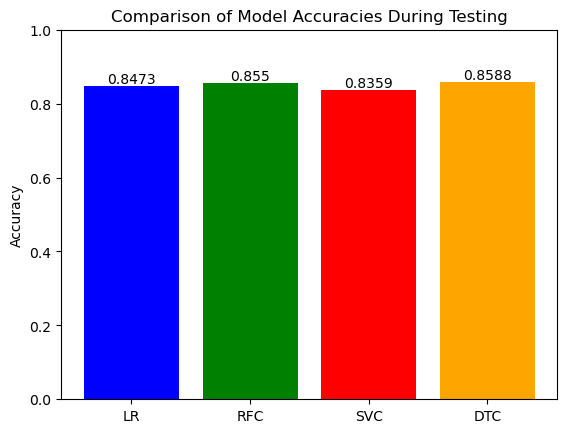

In [77]:
models = ['LR','RFC', 'SVC', 'DTC']
accuracies = [lor_accuracy_test,rfc_accuracy_test,dtc_accuracy_test, svc_accuracy_test]

# Plotting the bar chart
fig, ax = plt.subplots()
bars = ax.bar(models, accuracies, color=['blue', 'green', 'red','orange'])

# Adding the accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.ylim([0, 1])  
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies During Testing')
plt.show()

Here we find out that Random Forest Classifier and Decission Tree Classifier both have almost same accuracy. But we have classification problem that's why we have tried to find out ROC curve.

### Compare Receiving operating characterstic Curve

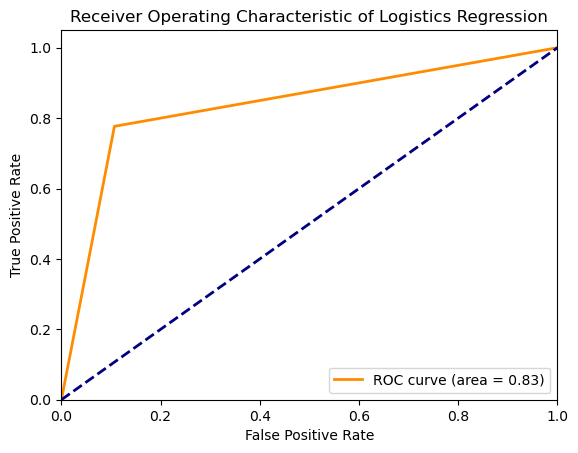

In [78]:
# Logistic Regression ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Logistics Regression')
plt.legend(loc="lower right")
plt.show()

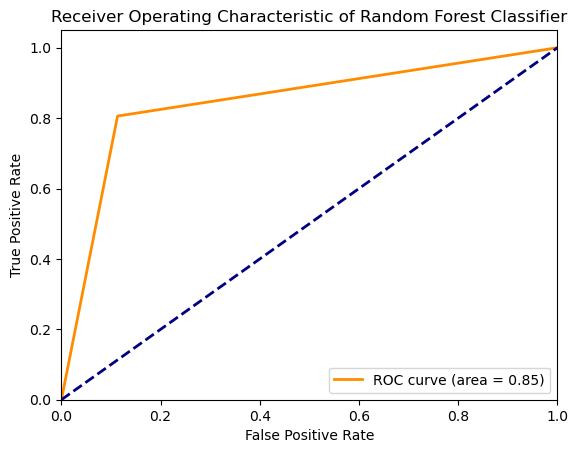

In [79]:
# Random Forest Classifier ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_preddd)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

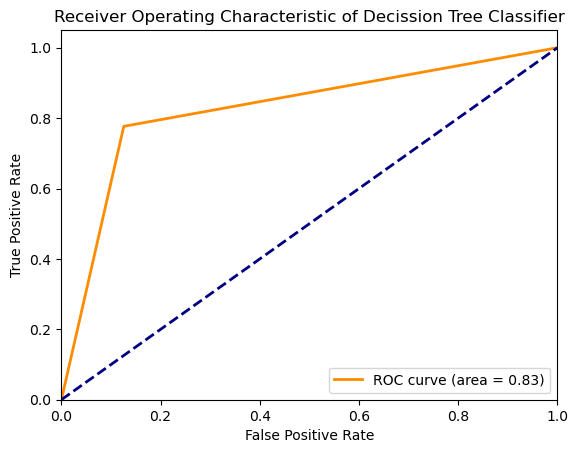

In [80]:
# Decission Tree Classifier ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_122)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Decission Tree Classifier')
plt.legend(loc="lower right")
plt.show()

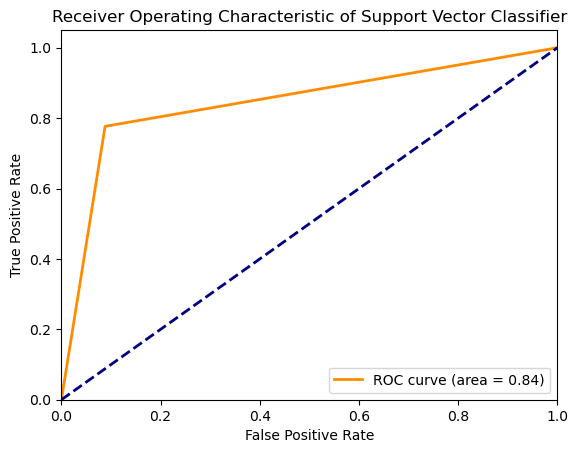

In [81]:
# Support Vector Classifier ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pdpd)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Support Vector Classifier')
plt.legend(loc="lower right")
plt.show()

## Model Finalization

### From the Above, we find the followings: -

#### (i) Random Forest and Decission Tree Classifier both have almost same accuracy i.e, 85%
#### (ii) ROC Curve of Random Forest Classifer becomes best from all the models with low FPR, high TPR and area = 85.
#### (iii) F-1 Score of the Random Forest Classifier is higher than the Decission Tree Classifier model.

#### Hence, We concluded that Random Forest Classifier is overall best model for this problem with high accuracy, high F-1 score and good ROC Curve.

## Insights from the Project are as follows: -

#### (i) Female Passengers had higher chance to survive than male passengers.
#### (ii) Class 1st Passengers had higher chance to survive rather than 2nd or 3rd class.
#### (iii) Passengers having 1 SibSp(No. of Sibling or Spouse) had higher chance to survive.
#### (iv) Passengers having 3 Parch(No. of Parents or Children) had higher chance to survive.
#### (v) Passengers who had a cabin had a higher chance of survival.
#### (vi) Passengers who had departured from Cherbourg had higher chance to survive.
#### (vii) Those Passengers whose age lied in between 1-18 had high chance to survive.
#### (viii) Those Passengers who paid high amount as fare, had higher chance to survive.